# Salary Prediction Machine Learning Project

The goal of this project is to predict person's salary by using just one variable which is year of experience.
Steps of implementation
* Import all the useful libraries (I use turicreate library for Sframe, we can use pandas also).  
* Load the dataset (data used in this project is downloaded from kaggle).
* Build the model (in this case linear regression model).
* Visualize the model using test and train data.


## Import useful libraries

In [6]:
import turicreate
import matplotlib.pyplot as plt

## Load Data

In [8]:
salary_data = turicreate.SFrame('Salary.csv')

Finished parsing file /home/astha/Salary.csv

Parsing completed. Parsed 35 lines in 0.053917 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/astha/Salary.csv

Parsing completed. Parsed 35 lines in 0.044545 secs.

In [9]:
salary_data

YearsExperience,Salary
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642
3.0,60150
3.2,54445
3.2,64445
3.7,57189


Since in the data set we have only 2 variables so its easy to visualize the data.

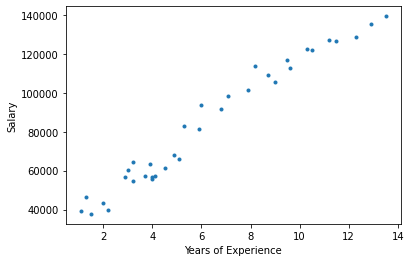

In [16]:
x = salary_data['YearsExperience']
y = salary_data['Salary']
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.plot(x, y, '.')

For further implementation we'll split the data in train and test data. 

In [55]:
train_data, test_data = salary_data.random_split(.7, seed = 1)

In [19]:
train_data

YearsExperience,Salary
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642
3.0,60150
3.2,54445
3.9,63218
4.0,55794


## Learn model

In [56]:
model_1 = turicreate.linear_regression.create(train_data, target='Salary', features = ['YearsExperience'], validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 22

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.000560     | 12909.768432       | 6191.943605                     |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [57]:
model_1.coefficients

name,index,value,stderr
(intercept),None,28259.65051262654,2975.625050080006
YearsExperience,None,8858.851348183283,393.1167665202687


## Prediction

Once the model is build now we'll predict the values using .predict() function.

In [58]:
predictions_train = model_1.predict(train_data)
predictions_train

dtype: float
Rows: 22
[38004.386995628156, 45977.35320899311, 47749.123478629765, 53950.319422358065, 62809.17077054134, 63695.05590535967, 63695.05590535967, 64580.941040178, 71668.02211872464, 75211.56265799794, 81412.75860172624, 88499.83968027287, 91157.49508472785, 98244.57616327448, 100902.23156772945, 107989.31264627608, 113304.62345518605, 119505.81939891436, 121277.58966855101, 127478.7856122793, 142538.8329041909, 147854.14371310087]

In [59]:
predictions_test = model_1.predict(test_data)
predictions_test

dtype: float
Rows: 13
[39776.15726526481, 41547.927534901464, 54836.20455717639, 56607.97482681305, 56607.97482681305, 61037.40050090469, 68124.48157945131, 73439.79238836128, 80526.87346690791, 105331.6572418211, 112418.73832036773, 130136.4410167343, 137223.52209528093]

## Residual Sum of Squares

Now that we have predicted the values, we can calculate the RSS value which is just a fancy word for difference, we use this to see the difference between true values and predicted values for both train and test data.

In [69]:
error = predictions_train - train_data['Salary']
RSS_train = (error**2).sum()
print('RSS of train data:', RSS_train)

RSS of train data: 843483643.3874208


In [70]:
error = predictions_test - test_data['Salary']
RSS_test = (error**2).sum()
print('RSS of test data:', RSS_test)

RSS of test data: 390334331.9789517


## Train Data Visualization

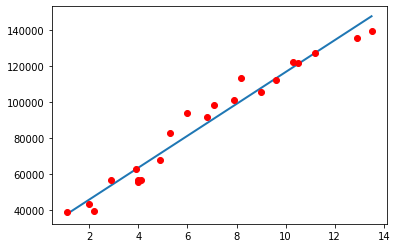

In [66]:
plt.plot(train_data['YearsExperience'], predictions_train, '-', linewidth = 2)
plt.plot(train_data['YearsExperience'], train_data['Salary'], 'ro')

## Test Data Visualization

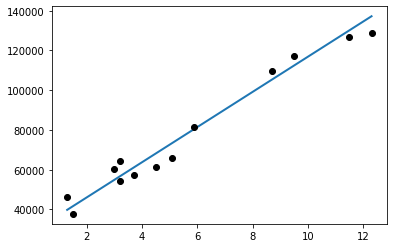

In [67]:
plt.plot(test_data['YearsExperience'], predictions_test, '-', linewidth = 2)
plt.plot(test_data['YearsExperience'], test_data['Salary'], 'ko')